<a href="https://colab.research.google.com/github/YonahJ/SCI/blob/main/ABM/unbiased_biased_mutation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def unbiased_mutation(N, tmax, p, mu):
  """Unbiased Transission model where N: is the population, tmax: number of generations. """
  p = (p, 1-p)
  traits = ("A", "B")
  #Create first gen
  df = np.random.choice(traits, size=N, p=p)
  #print(df)
  #create output
  ab = np.count_nonzero(df == 'A')
  data = [[1, ab/N]]
  output = pd.DataFrame(data, columns = ['tmax', 'p'])
  #print(output)

  mu = (mu, 1-mu)
  

  #Selection
  for t in range(2,tmax+1):
    mutate = np.random.choice((True, False), size=N, p=mu)
    for i in range(0, N):
      if mutate[i] == True:
        if df[i] == 'A':
          df[i] = 'B'
        elif df[i] == 'B':
          df[i] = 'A'
    #print(df)
    if 'A' in df:
      s = np.count_nonzero(df == 'A')
    else:
      s= 0
    o = {'tmax': t, 'p': s/N}
    output = output.append(o, ignore_index = True)
  #print(output)
  
  #Plot
  ax = plt.gca()
  output.plot(kind='line',x='tmax',y='p',ax=ax)
  plt.ylim(0, 1)

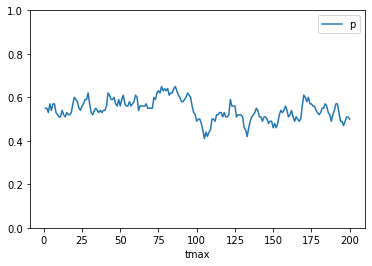

In [ ]:
unbiased_mutation(100, 200, 0.5, 0.05)

In [ ]:
def unbiased_mutation_2(N, tmax, p, mu, r):
  """Unbiased Transmission model with multiple runs where N: is the population, tmax: number of generations and r: number of runs. """
  runs=[]
  for r in range(r):
    unbiased_mutation(N, tmax, p, mu)
    runs.append(r+1)
    plt.legend(runs)


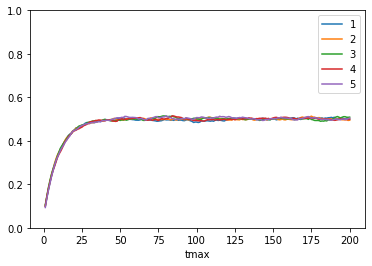

In [ ]:
unbiased_mutation_2(10000, 200, 0.1, 0.05, 5)